In [5]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
dados.columns = ['nao_finalizado','horas_esperadas','preco']
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [7]:
dados['finalizado'] = dados.nao_finalizado.replace([0,1],[1,0])

In [8]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


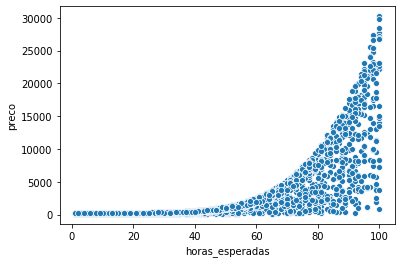

In [11]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

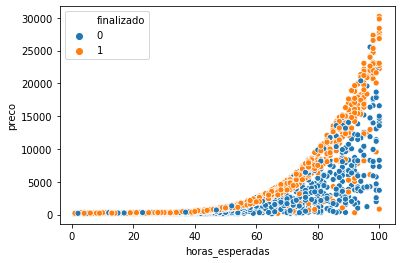

In [12]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados, hue='finalizado')

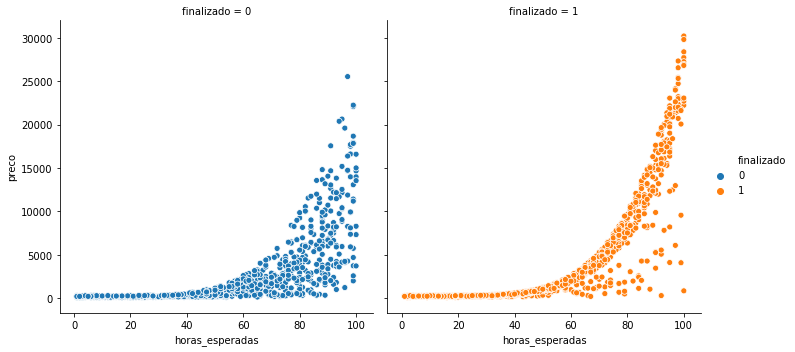

In [13]:
sns.relplot(x='horas_esperadas', y='preco', data=dados, hue='finalizado', col='finalizado')

In [14]:
#Seperando as features (x) e a classificação (y)

x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed=5
np.random.seed(seed)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                            test_size = 0.25,
                                            stratify = y)
print('treinaremos com {} elementos e testaremos com {} elementos'.format(len(x_train),len(x_test)))

modelo = LinearSVC()
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

previsoes_base = np.ones(540)

acuracia = accuracy_score(y_test, previsoes_base)*100
print('a acurácia do algoritmo de baseline foi {}%'.format(acuracia))

treinaremos com 1617 elementos e testaremos com 540 elementos
a acurácia do algoritmo de baseline foi 52.59259259259259%


C:\Users\FAEST\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


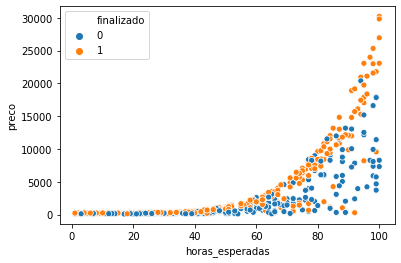

In [17]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=y_test, data=x_test)

In [18]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()
print(x_min,x_max,y_min,y_max)

1 100 100 30223


In [19]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels) 
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels) 

In [20]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [21]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

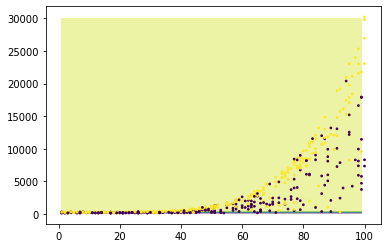

In [22]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z,alpha=0.4)
plt.scatter(x_test.horas_esperadas, x_test.preco, c=y_test, s=3)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

seed = 5
np.random.seed=seed
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                            test_size = 0.25,
                                            stratify = y)
print('treinaremos com {} elementos e testaremos com {} elementos'.format(len(x_train),len(x_test)))

modelo = SVC()
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

import numpy as np
previsoes_base = np.ones(540)

acuracia = accuracy_score(y_test, previsoes_base)*100
print('a acurácia do algoritmo de baseline foi {}%'.format(acuracia))

treinaremos com 1617 elementos e testaremos com 540 elementos
a acurácia do algoritmo de baseline foi 52.59259259259259%


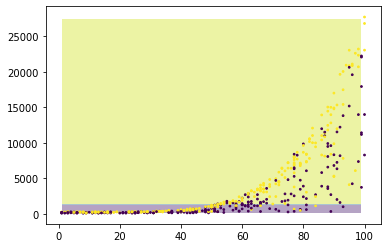

In [24]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels) 
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels) 

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z,alpha=0.4)
plt.scatter(x_test.horas_esperadas, x_test.preco, c=y_test, s=3)

In [25]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

seed=20
original_x_train, original_x_test, y_train, y_test = train_test_split(x,y,random_state = seed,
                                            test_size = 0.25,
                                            stratify = y)
print('treinaremos com {} elementos e testaremos com {} elementos'.format(len(x_train),len(x_test)))

scaler = StandardScaler()
scaler.fit(original_x_train)
x_train = scaler.transform(original_x_train)
x_test = scaler.transform(original_x_test)

modelo = SVC()
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

import numpy as np
previsoes_base = np.ones(540)

acuracia = accuracy_score(y_test, previsoes_base)*100
print('a acurácia do algoritmo de baseline foi {}%'.format(acuracia))

treinaremos com 1617 elementos e testaremos com 540 elementos
a acurácia do algoritmo de baseline foi 52.59259259259259%
